In [1]:
import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o los dataframes
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Importamos para hacer regresiones

df = pd.read_csv("Dataset Relevamiento.csv")  # Asi leemos el archivo que esta en la carpeta y mostramos a modo de ejemplo las 5 primeras filas
df.head (4)

,ID,provincia,departamento,localidad,nombre_barrio,otros_nombres_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,...,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,cosas_que_mas_le_gustan1,poligono,IDENTIFICAR,anio
0,TE_000001,BUENOS AIRES,TIGRE,CHASICÓ,el ahorcado,NaN,VILLA,190,1975.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,...,NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,OTRO,"-58.59945100000001,-34.405688 -58.600438,-34.4...",CUMPLE CON LA DEFINICIÓN,2016
1,TE_000008,NEUQUÉN,CONFLUENCIA,NEUQUÉN,nueva esperanza,dentro de villa ceferino,ASENTAMIENTO,30,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,...,NO,NO,NO,NO,SÍ,FALTA DE ACCESO A LOS SERVICIOS,UNIÓN Y FAMILIARIDAD ENTRE VECINOS,"-68.09599718832222,-38.94101958422372 -68.0956...",CUMPLE CON LA DEFINICIÓN,2016
2,TE_000009,NEUQUÉN,CONFLUENCIA,NEUQUÉN,loteo social 1,toma norte,ASENTAMIENTO,30,2007.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,...,NO,NO,NO,NO,NO,INSEGURIDAD/DELINCUENCIA,UNIÓN Y FAMILIARIDAD ENTRE VECINOS,"-68.11663400000001,-38.929042 -68.117119,-38.9...",CUMPLE CON LA DEFINICIÓN,2016
3,TE_000013,NEUQUÉN,CONFLUENCIA,NEUQUÉN,toma alto godoy,no tiene,ASENTAMIENTO,70,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,...,NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,TRANQUILIDAD,"-68.11655008297473,-38.93412118363295 -68.1163...",CUMPLE CON LA DEFINICIÓN,2016


In [2]:
df.describe ()         # Muestra estadistica basica del dataframe

,cantidad_de_familias,anio_creo_barrio,anio
count,2597.000000,2461.000000,2597.0
mean,266.507894,1987.847623,2016.0
std,630.088406,21.551054,0.0
min,3.000000,1888.000000,2016.0
25%,40.000000,1975.000000,2016.0
50%,100.000000,1991.000000,2016.0
75%,270.000000,2006.000000,2016.0
max,13000.000000,2015.000000,2016.0


In [3]:
df.describe (include = "all") # Muestra estadisticas de valores que no son numericos

,ID,provincia,departamento,localidad,nombre_barrio,otros_nombres_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,...,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,cosas_que_mas_le_gustan1,poligono,IDENTIFICAR,anio
count,2597,2597,2597,2589,2596,662,2288,2597.000000,2461.000000,2574,...,2150,2141,2153,2156,2130,2140,2121,2568,2597,2597.0
unique,2597,11,113,357,2360,620,6,NaN,NaN,6,...,5,4,5,4,5,10,9,2564,3,NaN
top,TE_003085,BUENOS AIRES,CAPITAL,CÓRDOBA CAPITAL,San Cayetano,-,ASENTAMIENTO,NaN,NaN,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,...,NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,FALTA DE ACCESO A LOS SERVICIOS,TRANQUILIDAD,0,CUMPLE CON LA DEFINICIÓN,NaN
freq,1,1440,400,126,12,10,1703,NaN,NaN,1575,...,1575,1457,1165,1340,1536,703,984,5,2438,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.507894,1987.847623,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.088406,21.551054,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1888.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,1975.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,1991.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.000000,2006.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0


In [4]:
df.info()        # Muestra que tipo de variables hay en el dataframe mas información adicional

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2597 non-null   object 
 1   provincia                  2597 non-null   object 
 2   departamento               2597 non-null   object 
 3   localidad                  2589 non-null   object 
 4   nombre_barrio              2596 non-null   object 
 5   otros_nombres_barrio       662 non-null    object 
 6   tipo_de_barrio             2288 non-null   object 
 7   cantidad_de_familias       2597 non-null   int64  
 8   anio_creo_barrio           2461 non-null   float64
 9   luz                        2574 non-null   object 
 10  excretas                   2574 non-null   object 
 11  agua                       2438 non-null   object 
 12  energia_calefaccion        2149 non-null   object 
 13  energia_cocinar            2143 non-null   objec

In [5]:
df.drop(['otros_nombres_barrio', 'IDENTIFICAR', 'cosas_que_mas_le_gustan1'], axis = 'columns', inplace=True) # Eliminamos columnas que no vamos a utilizar en el analisis


In [6]:
df["tipo_de_barrio"].fillna("VILLA", inplace = True) # Aca para no perder valores, segun que datos los NAN los transformo en un
df["nombre_barrio"].fillna("Otro", inplace = True) # dato que sea significativo para el analisis.
df["pendiente"].fillna("Plano", inplace = True)
df["anio_creo_barrio"].fillna("No sabe", inplace = True)
df["localidad"].fillna("Caba", inplace = True)
df["inundaciones"].fillna("No tuvo", inplace = True)
df["basural"].fillna("No tiene", inplace = True)
df["actividad_agropecuaria"].fillna("No tiene", inplace = True)
df["emergencias_ambulancia"].fillna("No tiene", inplace = True)
df["agua"].fillna("No tiene", inplace = True)
df["relleno_sanitario"].fillna("No tiene", inplace = True)
df["camino_de_alto_trafico"].fillna("No tiene", inplace = True)
df["desechos_industriales"].fillna("No sabe", inplace = True)
df["plantacion_forestal"].fillna("No sabe", inplace = True)
df["sala_medica"].fillna("No tiene", inplace = True)
df["emergencias_bomberos"].fillna("No tiene", inplace = True)
df["ribera_rio"].fillna("No tiene", inplace = True)
df["comisaria"].fillna("No tiene", inplace = True)
df["torres_de_alta_tension"].fillna("No tiene", inplace = True)
df["linea_de_tren"].fillna("No tiene", inplace = True)
df["organizaciones_externas"].fillna("No tiene", inplace = True)

In [7]:
df

,ID,provincia,departamento,localidad,nombre_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,excretas,...,plaza,centro_de_deportes,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,poligono,anio
0,TE_000001,BUENOS AIRES,TIGRE,CHASICÓ,el ahorcado,VILLA,190,1975.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-58.59945100000001,-34.405688 -58.600438,-34.4...",2016
1,TE_000008,NEUQUÉN,CONFLUENCIA,NEUQUÉN,nueva esperanza,ASENTAMIENTO,30,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"RED CLOACAL PÚBLICA CONECTADA AL PLUVIAL, AL D...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,NO,NO,SÍ,FALTA DE ACCESO A LOS SERVICIOS,"-68.09599718832222,-38.94101958422372 -68.0956...",2016
2,TE_000009,NEUQUÉN,CONFLUENCIA,NEUQUÉN,loteo social 1,ASENTAMIENTO,30,2007.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,NO,NO,NO,INSEGURIDAD/DELINCUENCIA,"-68.11663400000001,-38.929042 -68.117119,-38.9...",2016
3,TE_000013,NEUQUÉN,CONFLUENCIA,NEUQUÉN,toma alto godoy,ASENTAMIENTO,70,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 31 Y 50 CUADRAS(3 Y 5 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-68.11655008297473,-38.93412118363295 -68.1163...",2016
4,TE_000020,NEUQUÉN,CONFLUENCIA,NEUQUÉN,Auka Mahuida,ASENTAMIENTO,150,2004.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),A MENOS DE 10 CUADRAS (1 KM),NO,NO,NO,NO,NO,OTRO,"-68.07649248356904,-38.9414112252755 -68.07682...",2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,TE_004332,BUENOS AIRES,SAN NICOLAS,RÍO TALA,12/03/2016,ASENTAMIENTO,20,No sabe,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,0,2016
2593,TE_004333,BUENOS AIRES,ARRECIFES,ARRECIFES (CABECERA PDO.),lavalle,ASENTAMIENTO,25,No sabe,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.11637086009928,-34.06829519373805 -60.1161...",2016
2594,TE_004334,BUENOS AIRES,ARRECIFES,ARRECIFES (CABECERA PDO.),tucan y escalada,ASENTAMIENTO,30,No sabe,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.1207924,-34.0649966 -60.1214147,-34.065885...",2016
2595,TE_004335,BUENOS AIRES,BRAGADO,BRAGADO (CABECERA PDO.),hermanos islas,ASENTAMIENTO,10,No sabe,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.4987211494109,-35.10716108684236 -60.49969...",2016


In [8]:
df.info()        # Muestra que tipo de variables hay en el dataframe mas información adicional

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2597 non-null   object
 1   provincia                  2597 non-null   object
 2   departamento               2597 non-null   object
 3   localidad                  2597 non-null   object
 4   nombre_barrio              2597 non-null   object
 5   tipo_de_barrio             2597 non-null   object
 6   cantidad_de_familias       2597 non-null   int64 
 7   anio_creo_barrio           2597 non-null   object
 8   luz                        2574 non-null   object
 9   excretas                   2574 non-null   object
 10  agua                       2597 non-null   object
 11  energia_calefaccion        2149 non-null   object
 12  energia_cocinar            2143 non-null   object
 13  emergencias_policia        2148 non-null   object
 14  emergenc

In [9]:
df.dropna()

,ID,provincia,departamento,localidad,nombre_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,excretas,...,plaza,centro_de_deportes,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,poligono,anio
0,TE_000001,BUENOS AIRES,TIGRE,CHASICÓ,el ahorcado,VILLA,190,1975.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-58.59945100000001,-34.405688 -58.600438,-34.4...",2016
1,TE_000008,NEUQUÉN,CONFLUENCIA,NEUQUÉN,nueva esperanza,ASENTAMIENTO,30,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"RED CLOACAL PÚBLICA CONECTADA AL PLUVIAL, AL D...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,NO,NO,SÍ,FALTA DE ACCESO A LOS SERVICIOS,"-68.09599718832222,-38.94101958422372 -68.0956...",2016
2,TE_000009,NEUQUÉN,CONFLUENCIA,NEUQUÉN,loteo social 1,ASENTAMIENTO,30,2007.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,NO,NO,NO,INSEGURIDAD/DELINCUENCIA,"-68.11663400000001,-38.929042 -68.117119,-38.9...",2016
3,TE_000013,NEUQUÉN,CONFLUENCIA,NEUQUÉN,toma alto godoy,ASENTAMIENTO,70,1990.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 31 Y 50 CUADRAS(3 Y 5 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-68.11655008297473,-38.93412118363295 -68.1163...",2016
4,TE_000020,NEUQUÉN,CONFLUENCIA,NEUQUÉN,Auka Mahuida,ASENTAMIENTO,150,2004.0,CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),A MENOS DE 10 CUADRAS (1 KM),NO,NO,NO,NO,NO,OTRO,"-68.07649248356904,-38.9414112252755 -68.07682...",2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,TE_004081,TUCUMÁN,CAPITAL,SAN MIGUEL DE TUCUMÁN,nueva esperanza,ASENTAMIENTO,250,2012.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",SÍ,OTRO,"-65.22797778495792,-26.88922766953107 -65.2273...",2016
2372,TE_004082,TUCUMÁN,CAPITAL,SAN MIGUEL DE TUCUMÁN,barrio la gaceta,ASENTAMIENTO DE FORMA PLANIFICADA CON PARTICIP...,100,1945.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,"SI, PROVISTOS POR EL ESTADO.",NO,NO,INSEGURIDAD/DELINCUENCIA,"-65.16406783921376,-26.81880324752548 -65.1641...",2016
2405,TE_004123,TUCUMÁN,CAPITAL,SAN MIGUEL DE TUCUMÁN,Villa 9 de Julio,ASENTAMIENTO,150,1971.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),NO SABE / NO RESPONDE,NO,NO,"SI, PROVISTOS POR EL ESTADO.","SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",SÍ,INSEGURIDAD/DELINCUENCIA,"-65.17767910000001,-26.81221710000001 -65.1769...",2016
2406,TE_004124,TUCUMÁN,CAPITAL,SAN MIGUEL DE TUCUMÁN,Canal Norte,ASENTAMIENTO,30,1960.0,RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA...,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,"SI, HECHOS POR LOS VECINOS.",NO,NO,INSEGURIDAD/DELINCUENCIA,"-65.2108200213157,-26.79142068881948 -65.21064...",2016


In [10]:
df.tipo_de_barrio.value_counts() # Para ver la cantidad de valores en una columna determinada.

ASENTAMIENTO                                                                      1703
VILLA                                                                              773
ASENTAMIENTO DE FORMA PLANIFICADA CON PARTICIPACIÓN DEL ESTADO (LOTEO SOCIAL).      94
VILLA DE FORMA PLANIFICADA CON PARTICIPACIÓN DEL ESTADO (LOTEO SOCIAL).             25
Asentamiento                                                                         1
villa                                                                                1
Name: tipo_de_barrio, dtype: int64

In [11]:
# Reemplazamos valores muy largos por otros similares para simplificar
df.tipo_de_barrio = df.tipo_de_barrio.replace(["ASENTAMIENTO DE FORMA PLANIFICADA CON PARTICIPACIÓN DEL ESTADO (LOTEO SOCIAL).", "Asentamiento"], "ASENTAMIENTO")
df.tipo_de_barrio = df.tipo_de_barrio.replace(["VILLA DE FORMA PLANIFICADA CON PARTICIPACIÓN DEL ESTADO (LOTEO SOCIAL).", "villa"], "VILLA")

In [12]:
df.tipo_de_barrio.value_counts() # Para ver la cantidad de valores en una columna determinada.

ASENTAMIENTO    1798
VILLA            799
Name: tipo_de_barrio, dtype: int64

In [13]:
# Convertimos variables categoricas en numericas
pd.get_dummies (df ["tipo_de_barrio"] ) 

,ASENTAMIENTO,VILLA
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2592,1,0
2593,1,0
2594,1,0
2595,1,0


<AxesSubplot:xlabel='cantidad_de_familias', ylabel='tipo_de_barrio'>

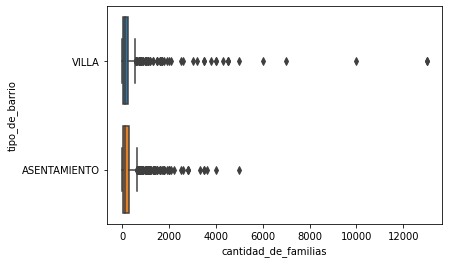

In [14]:
sns.boxplot(x="cantidad_de_familias", y="tipo_de_barrio", data=df)

In [15]:
# Repetimos el procedimiento con la columna "luz", "alumbrado" y "asfalto" para obtener valores numericos

<AxesSubplot:xlabel='anio_creo_barrio', ylabel='cantidad_de_familias'>

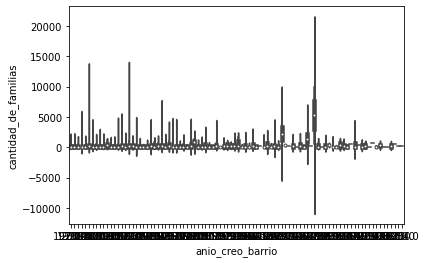

In [16]:
sns.violinplot(data=df, x='anio_creo_barrio', y='cantidad_de_familias')

<AxesSubplot:xlabel='cantidad_de_familias', ylabel='escuela_primaria'>

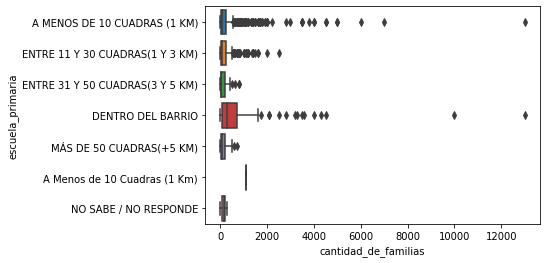

In [17]:
sns.boxplot(x="cantidad_de_familias", y="escuela_primaria", data=df)

In [18]:
df.luz.value_counts() # Para ver la cantidad de valores en una columna determinada.

CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHADOS A LA RED, CABLES A LOS POSTES DE LUZ DE LA CALLE, DE UNA FAMILIA A OTRA, ETC)                                   1575
RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA FAMILIA CON SU FACTURA, CON SU PROPIO MEDIDOR)                                                                      798
RED PÚBLICA CON MEDIDOR COMUNITARIO / SOCIAL. (NO HAY FACTURAS INDIVIDUALES, NO HAY UN MEDIDOR POR FAMILIA, SINO UNO O VARIOS MEDIDORES PARA MUCHAS FAMILIAS).     143
OTRO                                                                                                                                                                51
NO TIENE                                                                                                                                                             6
Conexión Irregular a la Red Pública. (Enganchados a la Red, Cables a los Postes de Luz de la Calle, de una Familia a Otra, Etc)                                      

In [19]:
# Reemplazamos valores muy largos por otros similares para simplificar
df.luz = df.luz.replace(["CONEXIÓN IRREGULAR A LA RED PÚBLICA. (ENGANCHADOS A LA RED, CABLES A LOS POSTES DE LUZ DE LA CALLE, DE UNA FAMILIA A OTRA, ETC)", "Conexión Irregular a la Red Pública. (Enganchados a la Red, Cables a los Postes de Luz de la Calle, de una Familia a Otra, Etc)"], "ENGANCHADOS")
df.luz = df.luz.replace(["RED PÚBLICA CON MEDIDORES DOMICILIARIOS. (CADA FAMILIA CON SU FACTURA, CON SU PROPIO MEDIDOR)", "RED PÚBLICA CON MEDIDOR COMUNITARIO / SOCIAL. (NO HAY FACTURAS INDIVIDUALES, NO HAY UN MEDIDOR POR FAMILIA, SINO UNO O VARIOS MEDIDORES PARA MUCHAS FAMILIAS)."], "RED PUBLICA")

In [20]:
df.luz.value_counts() # Para ver la cantidad de valores en una columna determinada.

ENGANCHADOS    1576
RED PUBLICA     941
OTRO             51
NO TIENE          6
Name: luz, dtype: int64

In [21]:
# Convertimos variables categoricas en numericas
gd_luz = pd.get_dummies (df ["luz"] ) 

In [22]:
df.alumbrado.value_counts() # Para ver la cantidad de valores en una columna determinada.

SI, PROVISTOS POR EL ESTADO.    1165
NO                               648
SI, HECHOS POR LOS VECINOS.      334
NO SABE / NO RESPONDE              5
Si, Provistos por el Estado.       1
Name: alumbrado, dtype: int64

In [23]:
# Reemplazamos valores muy largos por otros similares para simplificar
df.alumbrado = df.alumbrado.replace(["SI, PROVISTOS POR EL ESTADO.", "SI, HECHOS POR LOS VECINOS.", "Si, Provistos por el Estado."], "SI")
df.alumbrado = df.alumbrado.replace(["NO SABE / NO RESPONDE"], "NO")

In [24]:
df.alumbrado.value_counts() # Para ver la cantidad de valores en una columna determinada.

SI    1500
NO     653
Name: alumbrado, dtype: int64

In [25]:
# Convertimos variables categoricas en numericas
gd_alumbrado = pd.get_dummies (df ["alumbrado"] ) 

In [26]:
df.asfalto.value_counts() # Para ver la cantidad de valores en una columna determinada.

NO                       1457
SÍ                        681
NO SABE / NO RESPONDE       2
Si                          1
Name: asfalto, dtype: int64

In [27]:
df.asfalto = df.asfalto.replace(["NO SABE / NO RESPONDE"], "NO")
df.asfalto = df.asfalto.replace(["Si"], "SÍ")

In [28]:
df.asfalto.value_counts() # Para ver la cantidad de valores en una columna determinada.

NO    1459
SÍ     682
Name: asfalto, dtype: int64

In [29]:
# Convertimos variables categoricas en numericas
pd.get_dummies (df ["asfalto"] ) 

,NO,SÍ
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2592,0,0
2593,0,0
2594,0,0
2595,0,0


In [30]:
df

,ID,provincia,departamento,localidad,nombre_barrio,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,luz,excretas,...,plaza,centro_de_deportes,alcantarillado,asfalto,alumbrado,recoleccion_de_residuos,organizaciones_externas,mayores_problemas_barrio1,poligono,anio
0,TE_000001,BUENOS AIRES,TIGRE,CHASICÓ,el ahorcado,VILLA,190,1975.0,RED PUBLICA,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,SI,"SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-58.59945100000001,-34.405688 -58.600438,-34.4...",2016
1,TE_000008,NEUQUÉN,CONFLUENCIA,NEUQUÉN,nueva esperanza,ASENTAMIENTO,30,1990.0,ENGANCHADOS,"RED CLOACAL PÚBLICA CONECTADA AL PLUVIAL, AL D...",...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),NO,NO,NO,NO,SÍ,FALTA DE ACCESO A LOS SERVICIOS,"-68.09599718832222,-38.94101958422372 -68.0956...",2016
2,TE_000009,NEUQUÉN,CONFLUENCIA,NEUQUÉN,loteo social 1,ASENTAMIENTO,30,2007.0,ENGANCHADOS,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,A MENOS DE 10 CUADRAS (1 KM),MÁS DE 50 CUADRAS(+5 KM),NO,NO,NO,NO,NO,INSEGURIDAD/DELINCUENCIA,"-68.11663400000001,-38.929042 -68.117119,-38.9...",2016
3,TE_000013,NEUQUÉN,CONFLUENCIA,NEUQUÉN,toma alto godoy,ASENTAMIENTO,70,1990.0,ENGANCHADOS,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,A MENOS DE 10 CUADRAS (1 KM),ENTRE 31 Y 50 CUADRAS(3 Y 5 KM),NO,NO,SI,"SI, DE MANERA FORMAL. (EL CAMIÓN INGRESA AL BA...",NO,DROGA/ALCOHOL/TABACO,"-68.11655008297473,-38.93412118363295 -68.1163...",2016
4,TE_000020,NEUQUÉN,CONFLUENCIA,NEUQUÉN,Auka Mahuida,ASENTAMIENTO,150,2004.0,ENGANCHADOS,DESAGÜE A CÁMARA SÉPTICA Y POZO CIEGO,...,ENTRE 11 Y 30 CUADRAS(1 Y 3 KM),A MENOS DE 10 CUADRAS (1 KM),NO,NO,NO,NO,NO,OTRO,"-68.07649248356904,-38.9414112252755 -68.07682...",2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,TE_004332,BUENOS AIRES,SAN NICOLAS,RÍO TALA,12/03/2016,ASENTAMIENTO,20,No sabe,ENGANCHADOS,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,0,2016
2593,TE_004333,BUENOS AIRES,ARRECIFES,ARRECIFES (CABECERA PDO.),lavalle,ASENTAMIENTO,25,No sabe,ENGANCHADOS,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.11637086009928,-34.06829519373805 -60.1161...",2016
2594,TE_004334,BUENOS AIRES,ARRECIFES,ARRECIFES (CABECERA PDO.),tucan y escalada,ASENTAMIENTO,30,No sabe,RED PUBLICA,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.1207924,-34.0649966 -60.1214147,-34.065885...",2016
2595,TE_004335,BUENOS AIRES,BRAGADO,BRAGADO (CABECERA PDO.),hermanos islas,ASENTAMIENTO,10,No sabe,ENGANCHADOS,"DESAGÜE SÓLO A POZO NEGRO / CIEGO U HOYO, EXCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,No tiene,NaN,"-60.4987211494109,-35.10716108684236 -60.49969...",2016


In [31]:
# Convertimos variables categoricas en numericas
gd_asfalto = pd.get_dummies (df ["asfalto"] ) 

In [32]:
# Ahora unimos el dataframe y las dummy variable 
df = pd.concat([df, gd_asfalto], axis=1)
df = pd.concat([df, gd_alumbrado], axis=1)
df = pd.concat([df, gd_luz], axis=1)

# Eliminamos las columnas originales
df.drop("asfalto", axis = 1, inplace=True)
df.drop("luz", axis = 1, inplace=True)
df.drop("alumbrado", axis = 1, inplace=True)

In [33]:
# Eliminamos las demas columnas que no voy a utilizar en el analisis, lo anterior fue para practicar el manejo de los datos
df.drop("departamento", axis = 1, inplace=True)
df.drop("excretas", axis = 1, inplace=True)
df.drop("agua", axis = 1, inplace=True)
df.drop("poligono", axis = 1, inplace=True)
df.drop("anio", axis = 1, inplace=True)
df.drop("ID", axis = 1, inplace=True)
df.drop("localidad", axis = 1, inplace=True)
df.drop("energia_calefaccion", axis = 1, inplace=True)
df.drop("energia_cocinar", axis = 1, inplace=True)
df.drop("emergencias_policia", axis = 1, inplace=True)
df.drop("ribera_rio", axis = 1, inplace=True)
df.drop("pendiente", axis = 1, inplace=True)
df.drop("organizaciones_externas", axis = 1, inplace=True)
df.drop("mayores_problemas_barrio1", axis = 1, inplace=True)
df.drop("plantacion_forestal", axis = 1, inplace=True)
df.drop("emergencias_bomberos", axis = 1, inplace=True)
df.drop("emergencias_ambulancia", axis = 1, inplace=True)
df.drop("nombre_barrio", axis = 1, inplace=True)
df.drop("linea_de_tren", axis = 1, inplace=True)
df.drop("basural", axis = 1, inplace=True)
df.drop("torres_de_alta_tension", axis = 1, inplace=True)
df.drop("camino_de_alto_trafico", axis = 1, inplace=True)
df.drop("desechos_industriales", axis = 1, inplace=True)
df.drop("actividad_agropecuaria", axis = 1, inplace=True)
df.drop("relleno_sanitario", axis = 1, inplace=True)
df.drop("inundaciones", axis = 1, inplace=True)
df.drop("alcantarillado", axis = 1, inplace=True)
df.drop("recoleccion_de_residuos", axis = 1, inplace=True)
df.drop("jardin_de_infantes", axis = 1, inplace=True)
df.drop("escuela_primaria", axis = 1, inplace=True)
df.drop("escuela_secundaria", axis = 1, inplace=True)
df.drop("hospital", axis = 1, inplace=True)
df.drop("sala_medica", axis = 1, inplace=True)
df.drop("comisaria", axis = 1, inplace=True)
df.drop("parada_transporte_publico", axis = 1, inplace=True)
df.drop("plaza", axis = 1, inplace=True)
df.drop("centro_de_deportes", axis = 1, inplace=True)

df
# Las siguientes columnas contando desde la 6ta columna pertenecen a NO SÍ (ASFALTO), NO SI (ALUMBRADO), ENG|NO TIENE, ETC (LUZ)

,provincia,tipo_de_barrio,cantidad_de_familias,anio_creo_barrio,NO,SÍ,NO,SI,ENGANCHADOS,NO TIENE,OTRO,RED PUBLICA
0,BUENOS AIRES,VILLA,190,1975.0,1,0,0,1,0,0,0,1
1,NEUQUÉN,ASENTAMIENTO,30,1990.0,1,0,1,0,1,0,0,0
2,NEUQUÉN,ASENTAMIENTO,30,2007.0,1,0,1,0,1,0,0,0
3,NEUQUÉN,ASENTAMIENTO,70,1990.0,1,0,0,1,1,0,0,0
4,NEUQUÉN,ASENTAMIENTO,150,2004.0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2592,BUENOS AIRES,ASENTAMIENTO,20,No sabe,0,0,0,0,1,0,0,0
2593,BUENOS AIRES,ASENTAMIENTO,25,No sabe,0,0,0,0,1,0,0,0
2594,BUENOS AIRES,ASENTAMIENTO,30,No sabe,0,0,0,0,0,0,0,1
2595,BUENOS AIRES,ASENTAMIENTO,10,No sabe,0,0,0,0,1,0,0,0


In [34]:
#Procedemos a analizar la informacion

df.describe()

,cantidad_de_familias,NO,SÍ,NO,SI,ENGANCHADOS,NO TIENE,OTRO,RED PUBLICA
count,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.00000,2597.000000,2597.000000
mean,266.507894,0.561802,0.262611,0.251444,0.577590,0.606854,0.00231,0.019638,0.362341
std,630.088406,0.496261,0.440137,0.433927,0.494038,0.488543,0.04802,0.138780,0.480769
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,100.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
75%,270.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000
max,13000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [35]:
# COMENZAMOS A CALCULAR VALORES PARA PREDECIR NUEVOS RESULTADOS

In [36]:
lm = LinearRegression() # Definimos que es LM 
lm

LinearRegression()

In [37]:
X = df[['ENGANCHADOS']] # Definimos las variables en este caso el predictor
Y = df['cantidad_de_familias'] # Definimos el target

In [38]:
lm.fit(X,Y)

LinearRegression()

In [39]:
Yhat=lm.predict(X) # Pedimos una prediccion como resultado
Yhat[0:5]   

array([290.56317336, 250.92385787, 250.92385787, 250.92385787,
       250.92385787])

In [40]:
lm.intercept_ #Intercepcion con el eje Y

290.56317335945175

In [41]:
lm.coef_ # La pendiente de la predicción

array([-39.63931549])

In [42]:
# CANTIDAD DE FAMILIAS = 290.5631 - 39.6393 x Enganchados

(0.0, 13649.85)

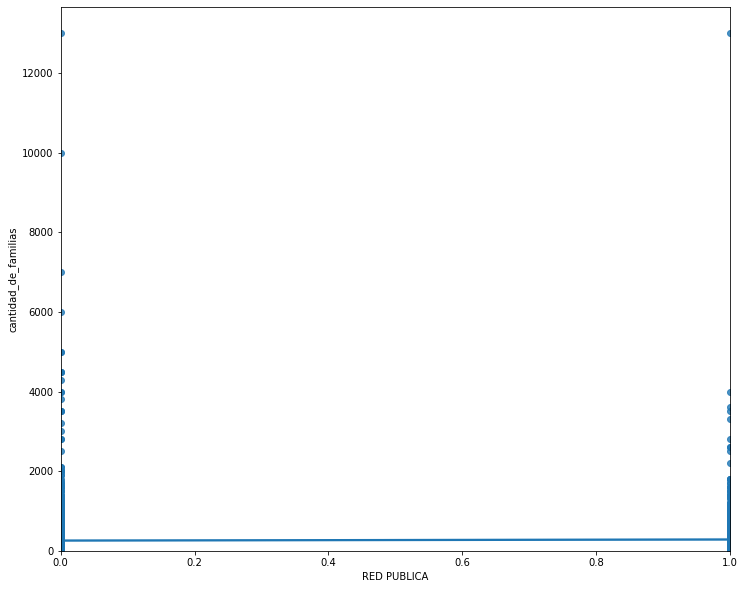

In [51]:
# Graficando la regresión
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="RED PUBLICA", y="cantidad_de_familias", data=df)
plt.ylim(0,)